* Author: Syed Sheheryar
* Idea  : To demonstrate the ensemble learning methods with to choose optimal bagging size. 

In [1]:
#Import libraries
import pandas                                            as pd
import numpy                                             as np

from sklearn.preprocessing import MinMaxScaler
from sklearn               import model_selection
from sklearn.ensemble      import BaggingClassifier      as bagclf
from sklearn.tree          import DecisionTreeClassifier as dt

In [2]:
df = pd.read_csv('../input/add.csv' ,usecols=list(range(0,1560)), index_col=False )

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(3279, 1560)

In [4]:
df.drop(axis=1, columns=['Unnamed: 0'], inplace=True )

In [5]:
df.dropna(inplace=True)
df = df.applymap(lambda val: np.nan if str(val).strip() == '?' else val)
df.fillna(0, inplace=True)

In [6]:
df.shape

(3279, 1559)

In [7]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
3274,170,94,0.5529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nonad.
3277,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nonad.
3278,40,40,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nonad.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3279 entries, 0 to 3278
Columns: 1559 entries, 0 to 1558
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB


In [9]:
#Checking for classes; two classes we have.
df.iloc[:,1558].unique()

array(['ad.', 'nonad.'], dtype=object)

In [10]:
#Converting the values  'ad' to 1 and 'nonad' to 0 
df.iloc[:,1558]= np.where(df.iloc[:,1558]=='ad.', 1, 0)

In [11]:
# Spliting into data and labels
X  = df.iloc[:,0:1558]
y  = df.iloc[:,1558]

In [12]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [13]:
y.unique()

array([1, 0])

In [14]:
#Declare variables
seed      = 0
num_trees = 100
#instantiate the kfold splitter
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [15]:
def getAccurcy(x, num_trees):
        model     = bagclf(dt(), max_samples=x, n_estimators=num_trees)
        results   = model_selection.cross_val_score(model, X, y, cv=kfold)
        return results.mean()

In [16]:
from matplotlib import pyplot as plt

#Populating lists
    
yList = []
for bagsize in np.arange(0.1, 1.1, 0.1):
    yList.append(getAccurcy(bagsize,100))

df_plot = pd.DataFrame({'x': np.arange(0.1, 1.1, 0.1), 'y': yList})


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  import sys


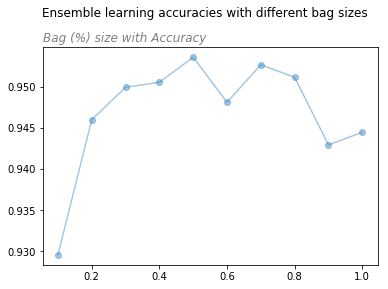

In [17]:

# initialize a figure
fig=plt.figure()

# Do a 2x2 chart
#plt.subplot(221)
plt.plot( 'x', 'y', data=df_plot, marker='o', alpha=0.4)
plt.title('Bag (%) size with Accuracy ' ,fontsize=12, color='grey', loc='left', style='italic')

# Add a title:"
plt.suptitle('Ensemble learning accuracies with different bag sizes', y=1.02)
plt.show()

** Conclusion: As the bag size increases; model's accuracy tends to decrease. **